In [2]:
import pandas as pd
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    male  22.0      1      0   
1                                       Cumings  female  38.0      1      0   
2                        Heikkinen, Miss. Laina  female  26.0      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                      Allen, Mr. William Henry    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [8]:
df = df.drop('Cabin',axis=1)

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [10]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [11]:
common = df['Embarked'].mode()[0]
df['Embarked']= df['Embarked'].fillna(common)

In [12]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [13]:
df['Sex'] = df['Sex'].map({'male' : 0 , 'female' : 1})

In [14]:
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,Cumings,1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S


In [16]:
df = pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [17]:
y = df['Survived']
x=df.drop(columns=['Survived','PassengerId'])

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,Cumings,1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [19]:
import seaborn as sns 
import matplotlib.pyplot as plt 


**Bar plot of survival by sex**


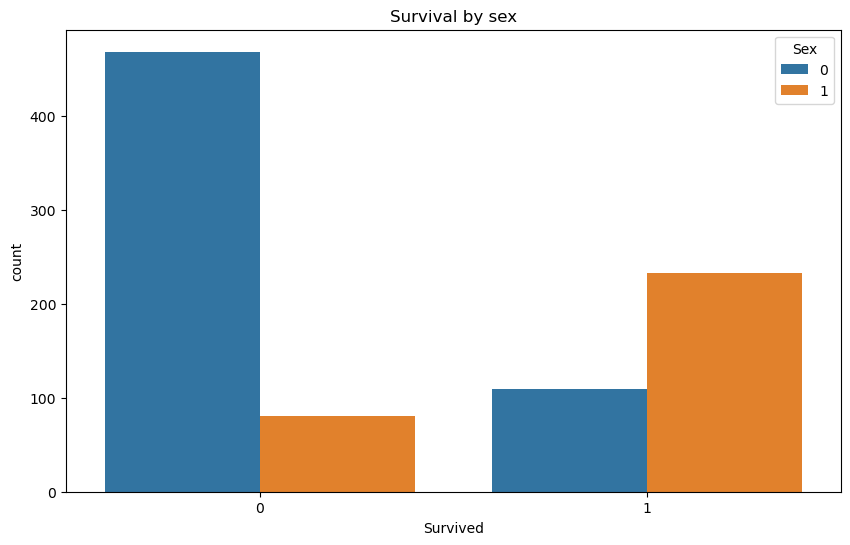

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Survival by sex')
plt.show()

**Bar plot of survival by class**


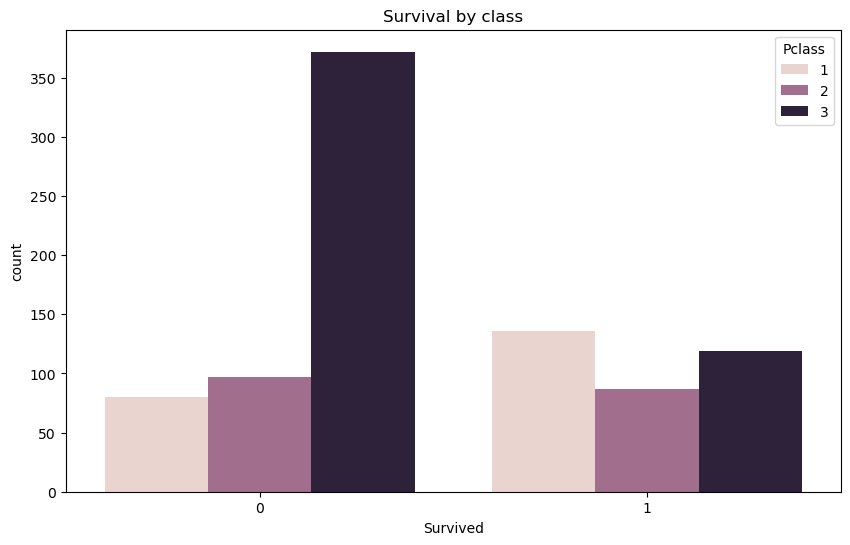

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title('Survival by class')
plt.show()


**Age distribution of survivors vs non-survivors**

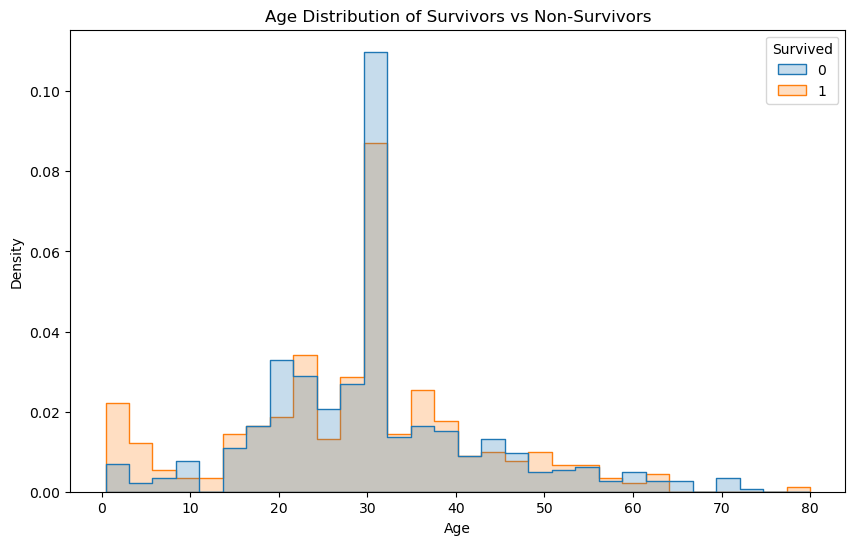

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='Age',hue='Survived',element='step',stat='density',common_norm=False)
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.show()

**Box plot of fare by survival**

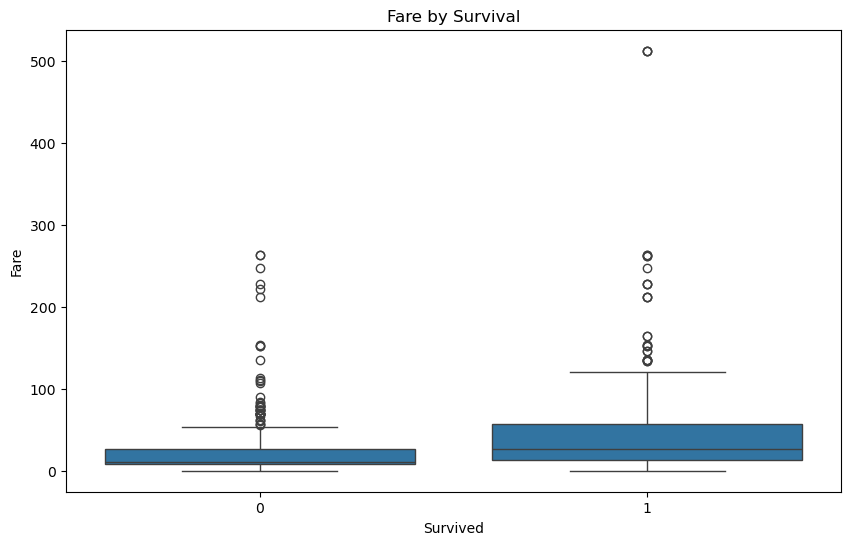

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived',y='Fare',data = df)
plt.title('Fare by Survival')
plt.show()

**feature**


In [29]:
selected_features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked_Q','Embarked_S']
x=df[selected_features]

In [30]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,False,False
2,3,1,26.0,0,0,7.9250,False,True
3,1,1,35.0,1,0,53.1000,False,True
4,3,0,35.0,0,0,8.0500,False,True


In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_pred,y_test)
class_report = classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")
print(f"F1 score:{f1}")
print(f"Confusion matrix:\n{conf_matrix}")
print(f"Classification report:\n{class_report}")

Accuracy:0.8100558659217877
Precision:0.7857142857142857
Recall:0.7432432432432432
F1 score:0.7638888888888888
Confusion matrix:
[[90 19]
 [15 55]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_pred,y_test)
class_report = classification_report(y_test,y_pred)
print(f"Accuracy:{accuracy}")
print(f"Precision:{precision}")
print(f"Recall:{recall}")
print(f"F1 score:{f1}")
print(f"Confusion matrix:\n{conf_matrix}")
print(f"Classification report:\n{class_report}")

Accuracy:0.8100558659217877
Precision:0.7857142857142857
Recall:0.7432432432432432
F1 score:0.7638888888888888
Confusion matrix:
[[90 19]
 [15 55]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), 
                                   param_distributions=param_grid, 
                                   n_iter=10,  # Number of parameter settings sampled
                                   cv=3,  # Number of folds in cross-validation
                                   n_jobs=-1, 
                                   verbose=2, 
                                   random_state=42)
random_search.fit(x_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

# Use the best model to make predictions on the test set
best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print evaluation metrics for the Random Forest model
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1 Score: {f1_rf}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")
print(f"Random Forest Classification Report:\n{class_report_rf}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Score: 0.8244453899703341
Random Forest Accuracy: 0.8491620111731844
Random Forest Precision: 0.8615384615384616
Random Forest Recall: 0.7567567567567568
Random Forest F1 Score: 0.8057553956834532
Random Forest Confusion Matrix:
[[96  9]
 [18 56]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       105
           1       0.86      0.76      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [88]:
# Output a brief description of the dataset and preprocessing steps
print("\nThe Titanic dataset contains information about passengers, including whether they survived or not.")
print("We handled missing values, converted categorical variables to numerical, and selected relevant features based on data visualization and correlation.")

# Output key visualizations
# (These visualizations were shown in previous steps.)

# Output the chosen model and its performance metrics
print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")

# Output a few examples of predictions on test data
print("\nExamples of predictions on test data:")
examples = x_test.head()
predictions = best_rf.predict(examples)
print(f"Features:\n{examples}")
print(f"Predictions: {predictions}")

# Output conclusions drawn from the model
print("\nConclusions:")
print("The Logistic Regression model provides a reasonable baseline with decent accuracy, precision, recall, and F1 score.")
print("The Random Forest model, after hyperparameter tuning, shows improved performance metrics.")
print("Further improvements can be made by experimenting with other models, more advanced feature engineering, and extensive hyperparameter tuning.")



The Titanic dataset contains information about passengers, including whether they survived or not.
We handled missing values, converted categorical variables to numerical, and selected relevant features based on data visualization and correlation.

Logistic Regression Model Performance:
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888

Random Forest Model Performance:
Accuracy: 0.8491620111731844
Precision: 0.8615384615384616
Recall: 0.7567567567567568
F1 Score: 0.8057553956834532

Examples of predictions on test data:
Features:
     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
709       3    0  29.699118      1      1  15.2458       False       False
439       2    0  31.000000      0      0  10.5000       False        True
840       3    0  20.000000      0      0   7.9250       False        True
720       2    1   6.000000      0      1  33.0000       False        True
39        3    1  14.00